In [618]:
import Bio

In [619]:
from Bio.Seq import Seq
from Bio import SeqIO

In [620]:
# GCAT

letters = "BDEFHIJKLMNOPQRSUVWXYZ"

def clean(seq):
    for letter in letters:
        seq = seq.replace(letter, '')
        return seq

In [621]:
seqX = SeqIO.read("x.fasta", "fasta")

In [622]:
seqY = SeqIO.parse('y.fasta', 'fasta')

In [623]:
# length before clean

print(len(seqX.seq))

# print(len(seqY.seq))
for rec in seqY:
    print(len(rec.seq))

1883
1050


Difference between using parse and read

In [624]:
# read will make the sequence file becomes an object which attributes can be acces using .attrib

print(seqX)
print("==========================================")
print(seqX.name)
print(seqX.seq)

ID: XM_006779407.2
Name: XM_006779407.2
Description: XM_006779407.2 PREDICTED: Myotis davidii seryl-tRNA synthetase (SARS), mRNA
Number of features: 0
Seq('ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGC...TCA')
XM_006779407.2
ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAG

In [625]:
# parse will make the sequence file into an array and to print it you need a loop

print(seqY)

In [626]:
# apparently either python or biopython is stupid so in order to print parsed sequence you need to declare it INSIDE the for loop or INSIDE the same column


# seqY = SeqIO.parse('y.fasta', 'fasta') <- if you use this change the part after in inside for loop using the variable
for i in SeqIO.parse('y.fasta', 'fasta'):
    # print(i.seq)
    i.seq = Seq(clean(str(i.seq)))
    print(i)

ID: OV986001.1
Name: OV986001.1
Description: OV986001.1 Pseudomonas fluorescens SBW25 genome assembly, chromosome: 1
Number of features: 0
Seq('GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCT...GAC')


Some little preprocessing

In [627]:
seqX.seq = Seq(clean(seqX.seq))

# Exercise

REMEMBER:

- seqX is using read
- seqY is using parse

## Total length

In [628]:
# seqX

print(len(seqX.seq))

1883


In [629]:
# seqY

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    print(len(i.seq))

1050


## Display first appearance of a codon (CGC)

In [630]:
# seqX

seqX.seq.find("CGC")

51

In [631]:
# seqY

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    print(i.seq.find("CGC"))

39


## Create new sequence

- first 10 last 5 for x
- first 20 last 3 from y
- combine into seqZ

to slice:

arr[:n] or arr[n:]

colon (:) placement represent from where you want to take the slice. Minus (-) means you want to exclude it

- [:n] take first n index
- [:-n] take first len - n index
- [n:] take last element starting from index n
- [-n:] take last element starting from len - n

this is stupid wtf

In [632]:
# seqX

seqXsplit = Seq(seqX.seq[:10] + seqX.seq[-5:])
print(seqXsplit)
len(seqXsplit)

ATGGTGTTGGAGTCA


15

In [633]:
split = ""

# I find it easier to track if the sequence are copied into a new var as a string
for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    split = i.seq
    
seqYsplit = Seq(split[:20] + split[-3:])
# len should be 23
print(seqYsplit)
len(seqYsplit)

GTGTCAGTGGAACTTTGGCAGAC


23

In [634]:
seqZ = seqXsplit + seqYsplit
seqZ = seqZ[::-1] # [::-1] to reverse
seqZ

Seq('CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA')

## DNA EDA procss

### Data plotting sequence Y

45 minutes into making this shit, just realized that the sequence used for the rest of this is sequence Z which would be easier but the method is totally same, just remove the loop

In [635]:
import matplotlib.pyplot as plt

In [636]:
seqAonly = ""
seqConly = ""

# I'm just lazy so this is probably the most brainrot way
for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    for letter in "GCT":
        i.seq = i.seq.replace(letter, "")
    seqAonly = i.seq
    
        
for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    for letter in "GAT":
        i.seq = i.seq.replace(letter, "")
    seqConly = i.seq
        
print(seqAonly)
print(seqConly)

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


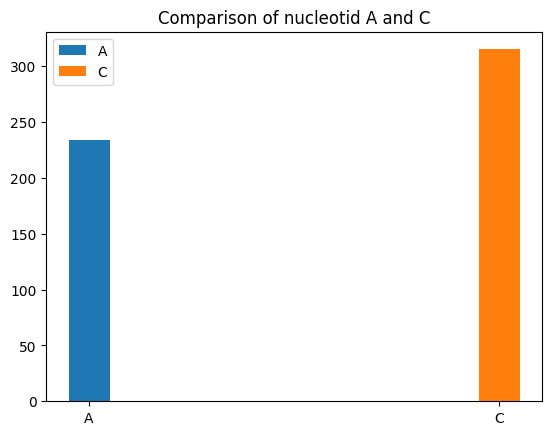

In [637]:
plt.bar(x=seqAonly, align='center', height= len(seqAonly), width=0.1)
plt.bar(x=seqConly, align='center', height= len(seqConly), width=0.1)
plt.title("Comparison of nucleotid A and C")
plt.legend("AC")
plt.show()

### percentage of GC and AT

to calculate GC percentage there is a module in BioSeqUtils called GC (in latest version it's called gc_fraction or you can use GC123) which will return the percentage of GC in the sequence. To display AT percent just 100 - GC percent

- gc_fraction -> returns float; fraction of GC in your entire sequence (gc_float * 100 to find the percentage)
- GC123 -> returns tupple consist of (according to index): percentage of GC in entire sequence and percentage of GC in first, second, and third codon

In [638]:
from Bio.SeqUtils import GC123, gc_fraction

GCpercent = 0

# using GC123
for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    GCpercent = GC123(i.seq)

ATpercent = 100.0 - GCpercent[0]

# using GC123
print(f"Percentage of GC: %{GCpercent[0]}" )
print(f"Percentage of AT: %{ATpercent}" )

Percentage of GC: %57.23809523809524
Percentage of AT: %42.76190476190476


In [639]:
# using gc_frac

GCpercent = 0

# using GC123
for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    GCpercent = gc_fraction(i.seq) * 100

ATpercent = 100.0 - GCpercent

# using GC123
print(f"Percentage of GC: %{GCpercent}" )
print(f"Percentage of AT: %{ATpercent}" )

Percentage of GC: %57.23809523809524
Percentage of AT: %42.76190476190476


### Melting point

another module from Bio.SeqUtils called Meltingtemp

This module contains three different methods to calculate the melting temperature of oligonucleotides:

- Tm_Wallace: ‘Rule of thumb’

- Tm_GC: Empirical formulas based on GC content. Salt and mismatch corrections can be included.

- Tm_NN: Calculation based on nearest neighbor thermodynamics. Several tables for DNA/DNA, DNA/RNA and RNA/RNA hybridizations are included. Correction for mismatches, dangling ends, salt concentration and other additives are available.

In [640]:
from Bio.SeqUtils import MeltingTemp as mt

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    print("Wallace method: ", mt.Tm_Wallace(i.seq))

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    print("GC method: ", mt.Tm_GC(i.seq))

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    print("NN method: ", mt.Tm_NN(i.seq))

Wallace method:  3302.0
GC method:  82.79909254816839
NN method:  86.2369020433818


### Molecular weight

Another module from Bio.SeqUtils literaly called molecular_weight

In [641]:
from Bio.SeqUtils import molecular_weight as mw

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    print("Seq C molecular weight: ", mw(i.seq))

Seq C molecular weight:  323955.0287


## Protein synthesize

from now sequence Z will be used

### Transcribe to mRNA

In [642]:
mRNA_Z = seqZ.transcribe()
print(mRNA_Z)

CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA


### Translate mRNA

In [643]:
print(len(mRNA_Z))
# apparently the mRNA for Z can't be modded by 3 which means that the translate() function need to trim it so that it could be modded by 3, future errors expected
tl_Z = mRNA_Z.translate()
tl_Z

38


C:\Users\Axioo Pongo\AppData\Roaming\Python\Python312\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('QTVSR*L*LRLW')

## Seq allign and simmilarities

In [644]:
from Bio import Align
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

### Local alignment pairwise X and Y

In [645]:
temp_seqY = ""

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    temp_seqY = i.seq

aligner = Align.PairwiseAligner()
aligner.mode = "local"
alignment = aligner.align(seqX.seq, temp_seqY)
scores = alignment.score
print(scores)

873.0


In [646]:
temp_seqY = ""

new_align = ""

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    temp_seqY = i.seq

new_align = pairwise2.align.localxx(seqX.seq, temp_seqY)

print(format_alignment(*new_align[0]))

6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--GNNNNNNNNNNNNNNNNNN-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGC

### Global alignment Y and Z

In [647]:
new_align = ""

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    new_align = pairwise2.align.globalxx(i.seq, seqZ)

print(format_alignment(*new_align[0]))

GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCCGGAGCTCG

### Hamming and Levenshtein

there is only 1 library for leven and no lib for hamming

#### Hamming between X and Y

Hamming is actually quite simple. Hamming distance by deffinition the number of symbols or positions of two strings at which their corresponding characters are different. In other terms the number of gaps from alignment. This means (CMIIW) we can use the alignment score to search for the Hamming distance by substracting the length of the longest sequence that we want to compare

In [648]:
temp_seqY = ""

for i in SeqIO.parse('y.fasta', 'fasta'):
    i.seq = Seq(clean(str(i.seq)))
    temp_seqY = i.seq

In [649]:
print(len(seqX))
print(len(temp_seqY))

1883
1050


In [650]:
hamming = len(seqX) - scores
hamming

1010.0

Quick note: Hamming distances ONLY works if the length of two strings are equal so use this method if and only if the len() are equal. Another method using functions is also do-able like in 4th session's slides but idc, I'm too lazy

#### Levenshtein

just use Levenshtein module, it's there, don't make live complicated la

In [651]:
%pip install Levenshtein

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [652]:
from Levenshtein import distance

leven = distance(seqX.seq, temp_seqY)
leven

1045